# Models

MutinomialNB with TfidVectorizer on Original Dataset 

- cleaned: accuracy - 0.65

- cleaned and stemmed: accuracy - 0.69

- cleaned and lemmized: accuracy - 0.70

MutinomialNB with CountVectorizer on Original Dataset 

- cleaned: accuracy - 0.77

- cleaned and stemmed: accuracy - 0.77

- cleaned and lemmized: accuracy - 0.80

- cleaned and dropped surprised label: accuracy - 0.83 (Best Model on Original Dataset)

MutinomialNB with TfidVectorizer on Second Dataset (First 10_000)

- cleaned: accuracy - 0.87

- cleaned and stemmed: accuracy - 0.84

- cleaned and lemmized: accuracy - 0.87

MutinomialNB with CountVectorizer on Second Dataset (First 10_000)

- cleaned: accuracy - 0.86

- cleaned and stemmed: accuracy - 0.84

- cleaned and lemmized: accuracy - 0.88 (Best Model on Second Dataset) (Live Model)

# Importing Python Libraries

In [2]:
# Import File Based Libraries
import pickle

# Import Data Wrangling Libraries
import pandas as pd
import numpy as np 
import re

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Machine Learning Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# Import NLP Libraries
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [71]:
import numpy as np
import os
import tensorflow
from tensorflow import keras

 
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical, np_utils
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Creating Dataframes from Original Dataset

In [41]:
#split up data with train and test 
train_df = pd.read_csv("data/original_data/training.csv")
test_df = pd.read_csv("data/original_data/test.csv")

train_df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Following 
https://coderzcolumn.com/tutorials/artificial-intelligence/keras-cnn-with-conv1d-for-text-classification#1

In [69]:
X_train_text, Y_train = [], []
for X in train_df['text']:
    X_train_text.append(X)
for Y in train_df['label']:
    Y_train.append(Y)
    
    
X_test_text, Y_test = [], []
for X in test_df['text']:
    X_test_text.append(X)
for Y in test_df['label']:
    Y_test.append(Y)

In [70]:
unique_classes = list(set(Y_train))
target_classes = ["sadness", "joy", "love", "anger", "fear", "surprise"]

## Subtracted 1 from labels to bring range from 1-4 to 0-3
Y_train, Y_test = np.array(Y_train) - 1, np.array(Y_test) - 1

len(X_train_text), len(X_test_text)

(16000, 2000)

In [72]:
max_tokens = 50 ## Hyperparameter

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_text+X_test_text)

## Vectorizing data to keep 50 words per sample.
X_train_vect = pad_sequences(tokenizer.texts_to_sequences(X_train_text), maxlen=max_tokens, padding="post", truncating="post", value=0.)
X_test_vect  = pad_sequences(tokenizer.texts_to_sequences(X_test_text), maxlen=max_tokens, padding="post", truncating="post", value=0.)

print(X_train_vect[:3])

X_train_vect.shape, X_test_vect.shape

[[   1  138    2  642    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   1   39  100   59    7   14  532    4   14 3764  548   31   59   61
   128  146   73 1593    3   21 1344    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [  15 2945    6 1172    4  289    1    2  462  414    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]]


((16000, 50), (2000, 50))

In [73]:
## What is word 444

print(tokenizer.index_word[444])

## How many times it comes in first text document??

print(X_train_text[0]) ## 2 times

confused
i didnt feel humiliated


In [74]:
embed_len = 128

inputs = Input(shape=(max_tokens, ))
embeddings_layer = Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embed_len,  input_length=max_tokens)
conv = Conv1D(32, 7, padding="same") ## Channels last
dense = Dense(len(target_classes), activation="softmax")

x = embeddings_layer(inputs)
x = conv(x)
x = tensorflow.reduce_max(x, axis=1)
output = dense(x)

model = Model(inputs=inputs, outputs=output)

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 128)           2071680   
                                                                 
 conv1d (Conv1D)             (None, 50, 32)            28704     
                                                                 
 tf.math.reduce_max (TFOpLam  (None, 32)               0         
 bda)                                                            
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
Total params: 2,100,582
Trainable params: 2,100,582
Non-trainable params: 0
___________________________________________________

2022-11-28 21:33:36.905368: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [75]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])

In [76]:
history = model.fit(X_train_vect, Y_train, batch_size=1024, epochs=8, validation_data=(X_test_vect, Y_test))

Epoch 1/8


2022-11-28 21:34:08.664645: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of -1 which is outside the valid range of [0, 6).  Label values: 0 0 -1 4 3 -1 -1 0 0 3 3 -1 0 -1 -1 2 0 -1 0 0 0 0 0 0 3 3 -1 -1 0 2 0 -1 2 1 0 3 4 2 1 1 1 1 0 0 0 0 3 3 3 3 2 -1 -1 0 -1 -1 0 3 0 0 2 -1 3 0 1 0 0 -1 -1 3 0 3 4 4 0 0 0 0 0 0 -1 0 1 1 -1 0 0 1 -1 0 0 0 1 -1 0 -1 2 -1 0 0 -1 3 -1 0 -1 0 1 -1 -1 0 -1 0 0 2 2 2 -1 1 1 3 0 4 -1 -1 -1 -1 -1 -1 0 3 0 -1 2 0 -1 -1 2 0 0 -1 -1 -1 0 -1 2 -1 -1 2 0 -1 -1 2 3 0 -1 3 0 0 -1 0 2 2 -1 -1 1 2 0 2 3 3 2 0 0 4 0 0 -1 -1 0 2 2 0 1 0 2 0 2 1 3 -1 4 3 -1 1 -1 0 2 0 2 1 1 3 -1 3 2 -1 0 3 0 3 -1 0 0 -1 2 -1 3 -1 0 0 0 0 2 4 0 -1 -1 -1 -1 0 2 3 -1 1 1 3 0 4 1 0 0 0 0 -1 -1 0 2 -1 0 -1 1 -1 3 0 -1 3 -1 3 0 2 4 2 0 -1 2 0 2 0 -1 1 -1 0 0 4 4 3 -1 -1 2 2 2 -1 -1 3 0 -1 1 -1 -1 -1 1 0 0 -1 3 -1 2 3 1 -1 1 0 -1 0 2 2 0 3 0 0 2 1 3 3 0 1 2 0 0 -1 2 -1 3 4 0 0 -1 0 -1 -1 -1 3 2 3 -1 0 0 2 1

InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/Users/idriod/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/idriod/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/idriod/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Users/idriod/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Users/idriod/opt/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
      await result
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/hh/qk4l6xwd65q9lfgxhl3nkd4w0000gn/T/ipykernel_814/1533788128.py", line 1, in <module>
      history = model.fit(X_train_vect, Y_train, batch_size=1024, epochs=8, validation_data=(X_test_vect, Y_test))
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 1862, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5202, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of -1 which is outside the valid range of [0, 6).  Label values: 0 0 -1 4 3 -1 -1 0 0 3 3 -1 0 -1 -1 2 0 -1 0 0 0 0 0 0 3 3 -1 -1 0 2 0 -1 2 1 0 3 4 2 1 1 1 1 0 0 0 0 3 3 3 3 2 -1 -1 0 -1 -1 0 3 0 0 2 -1 3 0 1 0 0 -1 -1 3 0 3 4 4 0 0 0 0 0 0 -1 0 1 1 -1 0 0 1 -1 0 0 0 1 -1 0 -1 2 -1 0 0 -1 3 -1 0 -1 0 1 -1 -1 0 -1 0 0 2 2 2 -1 1 1 3 0 4 -1 -1 -1 -1 -1 -1 0 3 0 -1 2 0 -1 -1 2 0 0 -1 -1 -1 0 -1 2 -1 -1 2 0 -1 -1 2 3 0 -1 3 0 0 -1 0 2 2 -1 -1 1 2 0 2 3 3 2 0 0 4 0 0 -1 -1 0 2 2 0 1 0 2 0 2 1 3 -1 4 3 -1 1 -1 0 2 0 2 1 1 3 -1 3 2 -1 0 3 0 3 -1 0 0 -1 2 -1 3 -1 0 0 0 0 2 4 0 -1 -1 -1 -1 0 2 3 -1 1 1 3 0 4 1 0 0 0 0 -1 -1 0 2 -1 0 -1 1 -1 3 0 -1 3 -1 3 0 2 4 2 0 -1 2 0 2 0 -1 1 -1 0 0 4 4 3 -1 -1 2 2 2 -1 -1 3 0 -1 1 -1 -1 -1 1 0 0 -1 3 -1 2 3 1 -1 1 0 -1 0 2 2 0 3 0 0 2 1 3 3 0 1 2 0 0 -1 2 -1 3 4 0 0 -1 0 -1 -1 -1 3 2 3 -1 0 0 2 1 0 0 2 3 2 3 -1 2 0 0 -1 3 2 0 -1 0 0 0 -1 0 1 3 0 0 0 0 1 -1 3 0 -1 -1 2 -1 -1 0 2 -1 2 3 -1 4 2 2 -1 2 0 -1 0 3 -1 0 0 3 0 -1 3 0 0 -1 0 -1 1 -1 0 0 3 0 0 3 0 0 -1 3 2 -1 -1 0 2 2 1 1 0 1 3 2 2 4 -1 -1 2 0 0 0 2 -1 0 0 0 3 2 -1 0 2 0 0 0 2 2 -1 0 0 3 -1 0 1 -1 0 3 -1 0 -1 3 0 4 3 -1 3 -1 -1 0 -1 2 0 1 0 0 4 0 0 -1 -1 -1 0 0 -1 -1 0 2 0 -1 0 -1 0 -1 0 0 1 -1 4 -1 -1 -1 -1 2 -1 0 0 -1 3 2 -1 0 0 -1 3 -1 0 -1 0 1 3 2 2 -1 -1 0 3 1 -1 2 0 2 -1 0 -1 0 0 0 0 -1 0 0 3 -1 2 0 2 0 3 -1 3 0 -1 -1 0 2 0 -1 -1 1 0 0 1 4 0 0 -1 3 3 2 4 4 1 0 3 0 -1 0 0 -1 0 -1 -1 -1 0 2 0 0 -1 0 -1 0 0 4 0 2 0 -1 3 0 0 -1 0 -1 0 0 -1 3 -1 0 0 0 -1 -1 3 0 3 1 3 -1 3 0 -1 3 3 3 0 3 3 0 3 2 0 0 -1 0 2 -1 -1 -1 -1 -1 3 0 0 3 -1 3 3 -1 0 0 2 -1 -1 -1 0 2 0 2 -1 2 0 0 -1 0 3 -1 3 -1 0 2 0 3 0 -1 -1 0 -1 -1 3 -1 3 -1 0 0 1 0 -1 0 -1 0 0 1 0 0 0 0 2 0 -1 0 -1 -1 1 1 0 0 0 2 2 0 3 -1 -1 0 0 -1 -1 -1 4 0 -1 -1 0 4 2 -1 0 -1 0 4 -1 2 1 -1 0 3 0 -1 -1 0 -1 0 2 -1 2 3 0 0 2 0 4 -1 0 -1 2 1 -1 0 2 3 3 3 3 0 3 -1 0 3 0 3 2 0 0 0 2 -1 -1 -1 0 0 0 1 1 -1 3 0 2 -1 0 3 1 -1 -1 3 3 3 -1 -1 -1 1 -1 0 0 0 2 -1 1 0 1 1 -1 -1 0 2 0 0 0 0 2 0 -1 2 0 0 -1 1 -1 -1 0 -1 -1 0 -1 3 2 -1 3 0 0 2 -1 2 2 -1 3 -1 2 3 2 0 2 -1 3 3 0 0 -1 -1 0 0 2 -1 3 0 0 2 -1 2 0 0 0 0 2 -1 -1 -1 -1 0 -1 3 3 3 -1 3 0 2 2 0 -1 1 0 -1 2 0 -1 -1 -1 -1 1 1 1 3 3 -1 0 4 0 3 4 -1 2 0 0 0 0 -1 0 3 0 4 -1 -1 1 4 0 0 -1 -1 3 2 0 0 -1 0 0 3 2 -1 0 -1 -1 -1 -1 3 2 2 -1 -1 1 3 1 1 1 -1 2 -1 -1 1 0 3 3 0 0 -1 3 -1 4 1 4 0 2 2 0 0 1 -1 2 0 0 2 4 3 -1 3 -1 1 0 4 0 3 0 3 0 3 0 2 0 -1 2 3 0 0 -1 3 1 0 0 0 1 2 4 2 0 1 0 1 0 3 0 -1 0 2
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_732]


# ---------------------------NOT YET----------------------------

# Creating Dataframes from Second Dataset

In [8]:
data =pickle.load(open('data/second_data/merged_training.pkl','rb'))
new_df = pd.DataFrame(data).reset_index(drop=True)
new_df.head()

,text,emotions
0,i feel awful about it too because it s my job ...,sadness
1,im alone i feel awful,sadness
2,ive probably mentioned this before but i reall...,joy
3,i was feeling a little low few days back,sadness
4,i beleive that i am much more sensitive to oth...,love


# EDA on Second Dataset

<AxesSubplot:xlabel='emotions', ylabel='count'>

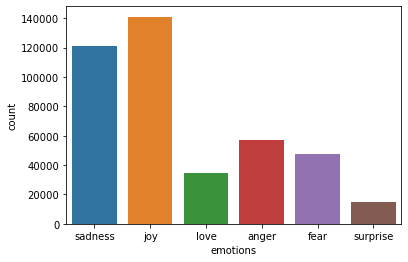

In [9]:
sns.countplot(x=new_df['emotions'])

In [10]:
new_df['emotions'].value_counts()

joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: emotions, dtype: int64

# Testing on Second Dataset with Bag of Words Vectorizer and Multinomial Naive Bayes Classifier

In [11]:
#Made a copy of the data frame
new_df_10000_2 = new_df.copy()

#Getting 10k Sadness
sadness_df = new_df_10000_2[new_df_10000_2['emotions'] == 'sadness']
sadness_df_10000 = sadness_df.iloc[:10000].reset_index(drop=True)
display(sadness_df_10000.shape)
display(sadness_df_10000.head())

#Getting 10k Joy
joy_df = new_df_10000_2[new_df_10000_2['emotions'] == 'joy']
joy_df_10000 = joy_df.iloc[:10000].reset_index(drop=True)
display(joy_df_10000.shape)
display(joy_df_10000.head())

#Getting 10k Love
love_df = new_df_10000_2[new_df_10000_2['emotions'] == 'love']
love_df_10000 = love_df.iloc[:10000].reset_index(drop=True)
display(love_df_10000.shape)
display(love_df_10000.head())

#Getting 10k Anger
anger_df = new_df_10000_2[new_df_10000_2['emotions'] == 'anger']
anger_df_10000 = anger_df.iloc[:10000].reset_index(drop=True)
display(anger_df_10000.shape)
display(anger_df_10000.head())

#Getting 10k Fear
fear_df = new_df_10000_2[new_df_10000_2['emotions'] == 'fear']
fear_df_10000 = fear_df.iloc[:10000].reset_index(drop=True)
display(fear_df_10000.shape)
display(fear_df_10000.head())

#Getting 10k Surprise
surprise_df = new_df_10000_2[new_df_10000_2['emotions'] == 'surprise']
surprise_df_10000 = surprise_df.iloc[:10000].reset_index(drop=True)
display(surprise_df_10000.shape)
display(surprise_df_10000.head())

(10000, 2)

,text,emotions
0,i feel awful about it too because it s my job ...,sadness
1,im alone i feel awful,sadness
2,i was feeling a little low few days back,sadness
3,i also feel disillusioned that someone who cla...,sadness
4,i wish you knew every word i write i write for...,sadness


(10000, 2)

,text,emotions
0,ive probably mentioned this before but i reall...,joy
1,i am one of those people who feels like going ...,joy
2,i feel especially pleased about this as this h...,joy
3,i was struggling with these awful feelings and...,joy
4,i mean is on this stupid trip of making the gr...,joy


(10000, 2)

,text,emotions
0,i beleive that i am much more sensitive to oth...,love
1,i find myself frustrated with christians becau...,love
2,i feel blessed everyday for our little man and...,love
3,i alternate between feeling sympathetic toward...,love
4,i feel passionate about today because of him,love


(10000, 2)

,text,emotions
0,i feel so enraged but helpless at the same time,anger
1,i said feeling a bit rebellious,anger
2,i woke up feeling particularly vile tried to i...,anger
3,i could feel the vile moth burrowing its way i...,anger
4,i have a pretty bad feeling the last two books...,anger


(10000, 2)

,text,emotions
0,i feel weird knowing mine died when i wasn t a...,fear
1,i don t like to feel uncomfortable with being ...,fear
2,i apologize to him almost every day for my lac...,fear
3,i see things so clearly and with so much depth...,fear
4,i feel doubtful about my place in the world of...,fear


(10000, 2)

,text,emotions
0,i pretty much waddled out of the hospital feel...,surprise
1,i cant even imagine how my mom and her three y...,surprise
2,i would recommend watching them to feel amazed...,surprise
3,i feel that i have a really funny side that i ...,surprise
4,i can say that i feel amazed,surprise


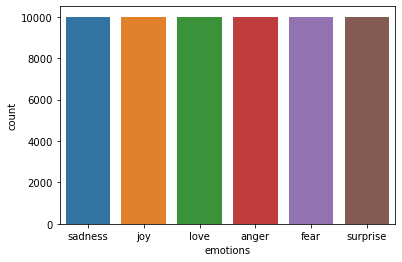

In [12]:
#Concated all the serparted data frames of all the emotions and but them back together
all_10k_df = pd.concat([sadness_df_10000, joy_df_10000, love_df_10000, anger_df_10000, fear_df_10000, surprise_df_10000])
sns.countplot(x=all_10k_df['emotions'])
plt.show()

In [13]:
#creating new column with cleaned up text
all_10k_df['cleaned_text'] = all_10k_df['text'].apply(clean_tweets_without_nlp)
print("Original text: ", all_10k_df.iloc[0]['text'])
print("Cleaned test: ", all_10k_df.iloc[0]['cleaned_text'])

Original text:  i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here
Cleaned test:  i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here


In [14]:
#creating new column with stemmed cleaned up text
all_10k_df['cleaned_text_stem'] = all_10k_df['text'].apply(clean_tweets_with_stem)
print("Original text: ", all_10k_df.iloc[0]['text'])
print("Stemmed test: ", all_10k_df.iloc[0]['cleaned_text_stem'])

Original text:  i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here
Stemmed test:  feel aw job get posit succeed happen


In [15]:
#creating new colum with lemmzed cleaned up text
all_10k_df['cleaned_text_lem'] = all_10k_df['text'].apply(clean_tweets_with_lem)
print("Original text: ", all_10k_df.iloc[0]['text'])
print("Lemmized test: ", all_10k_df.iloc[0]['cleaned_text_lem'])

Original text:  i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here
Lemmized test:  feel awful job get position succeed happen


In [16]:
all_10k_df.head()

,text,emotions,cleaned_text,cleaned_text_stem,cleaned_text_lem
0,i feel awful about it too because it s my job ...,sadness,i feel awful about it too because it s my job ...,feel aw job get posit succeed happen,feel awful job get position succeed happen
1,im alone i feel awful,sadness,im alone i feel awful,im alon feel aw,im alone feel awful
2,i was feeling a little low few days back,sadness,i was feeling a little low few days back,feel littl low day back,feeling little low day back
3,i also feel disillusioned that someone who cla...,sadness,i also feel disillusioned that someone who cla...,also feel disillus someon claim valu truth fraud,also feel disillusioned someone claimed value ...
4,i wish you knew every word i write i write for...,sadness,i wish you knew every word i write i write for...,wish knew everi word write write think useless...,wish knew every word write write think useless...


# Testing CNN

In [26]:
all_10k_df.columns #['text', 'label', 'cleaned_text', 'cleaned_text_stem', 'cleaned_text_lem']

X = all_10k_df['cleaned_text'].values
y = all_10k_df['emotions'].values

In [24]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(X)

<60000x29838 sparse matrix of type '<class 'numpy.float64'>'
	with 945942 stored elements in Compressed Sparse Row format>

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

NameError: name 'X' is not defined

In [ ]:
max_tokens = X.shape[1]
embed_len = 128
target_classes = all_10k_df['emotions'].unique()

inputs = Input(shape=(max_tokens, ))
embeddings_layer = Embedding(input_dim=1000, output_dim=embed_len, input_length=max_tokens)
conv = Conv1D(32, 7, padding="same") ## Channels last
dense = Dense(len(target_classes), activation="softmax")

x = embeddings_layer(inputs)
x = conv(x)
x = tensorflow.reduce_max(x, axis=1)
output = dense(x)

model = Model(inputs=inputs, outputs=output)

model.summary()


In [ ]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=1024, epochs=8, validation_data=(X_test, y_test))